# DBSCAN implementation in python programming language from scratch
The source code is an implementation of the DBSCAN clustering algorithm in python from scratch. Also, it was applied to five datasets, as shown in the jupyter notebook. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from sklearn.metrics import accuracy_score
plt.rcParams["figure.figsize"] = (10,6)
sns.set_theme(style="darkgrid", palette="pastel") 



In [12]:
def DBSCAN(X,min_sample,esp):
    # defualt cluster -0- for noisy points
    Cluster = np.zeros(X.shape[0])
    visited = []
    queue = []
    Cluster_Index = 1
    
    # loop for checking all data points
    for index in range(X.shape[0]):
        if index in visited:
            continue
        # visit the point    
        visited.append(index)
        
        # add point to queue to process
        queue.append(index)
        
        # the list that all data points are neighbours
        process = [index]
        
        # a loop for process all neighbours that obtained chainly until thier distance smaller than esp
        while len(queue) !=0:
            
            # calculate distance of this data point to all points
            distances = euclidean_distances([X[queue[0]]],X)[0].T
            
            # select data pints that have smaller distnace according to esp
            neighbour = np.where(distances<=esp)[0]
            
            # check neighbours that not processed before
            for n in neighbour:
                if n in visited or n in queue or n in process:
                    continue
                    
                process.append(n)
                visited.append(n)
                queue.append(n)
                
            # first point of queue processed, so we deleted
            del queue[0]
         
        # check if obtained group of data points satisfy the count of min samples
        if len(process) >= min_sample :
            Cluster[process] = [Cluster_Index]*len(process)   
            
            #increase the cluster label
            Cluster_Index += 1
            
            
    return Cluster
    
# from : https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 



# Clustering for Compound dataset

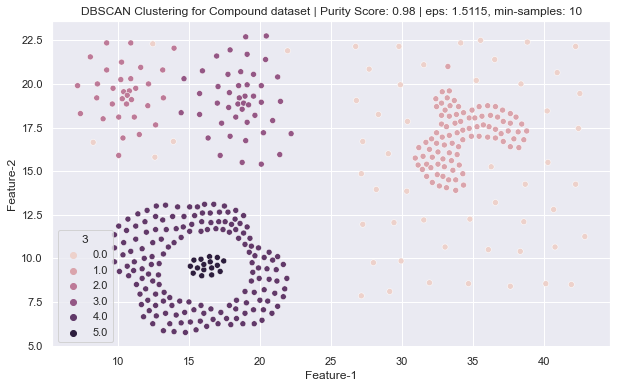

In [13]:
# read dataset 
data = pd.read_csv("./data/3/Compound.txt",delim_whitespace=True,header=None)
X = np.array(data[[0,1]])

# run dbscan
data[3] = DBSCAN(X,10,1.5115)

#plot the results
info = data.to_dict()
pu = purity_score(data[2],data[3])

sns.scatterplot(data=info,x=0,y=1,hue=3)
plt.title("DBSCAN Clustering for Compound dataset | Purity Score: {0} | eps: {1}, min-samples: {2}".format(round(pu,2),1.5115,10))
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

# Clustering for D31 dataset

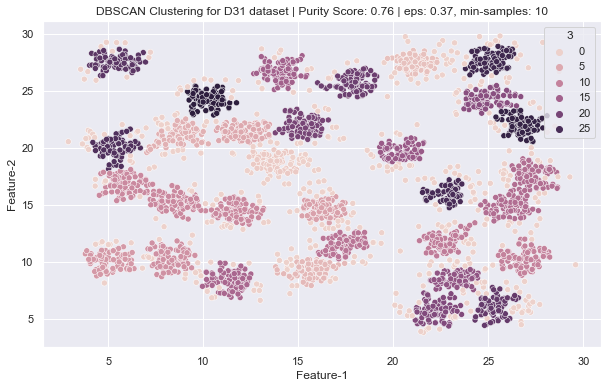

In [14]:
# read dataset 
data = pd.read_csv("./data/3/D31.txt",delim_whitespace=True,header=None).sample(frac = 1)
X = np.array(data[[0,1]])

# run dbscan
data[3] = DBSCAN(X,10,0.37)

#plot the results
info = data.to_dict()
pu = purity_score(data[2],data[3])
sns.scatterplot(data=info,x=0,y=1,hue=3)
plt.title("DBSCAN Clustering for D31 dataset | Purity Score: {0} | eps: {1}, min-samples: {2}".format(round(pu,2),0.37,10))
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

# Clustering for pathbased dataset

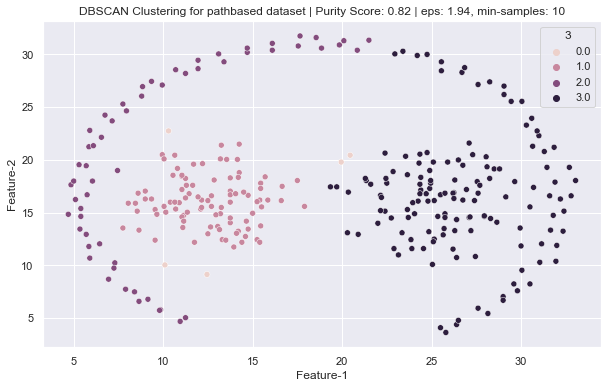

In [15]:
# read dataset 
data = pd.read_csv("./data/3/pathbased.txt",delim_whitespace=True,header=None).sample(frac = 1)
X = np.array(data[[0,1]])

# run dbscan
data[3] = DBSCAN(X,10,1.94)

#plot the results
info = data.to_dict()
sns.scatterplot(data=info,x=0,y=1,hue=3)
pu = purity_score(data[2],data[3])

plt.title("DBSCAN Clustering for pathbased dataset | Purity Score: {0} | eps: {1}, min-samples: {2}".format(round(pu,2),1.94,10))
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

# Clustering for rings dataset 

<ipython-input-16-eccc27a24e16>:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


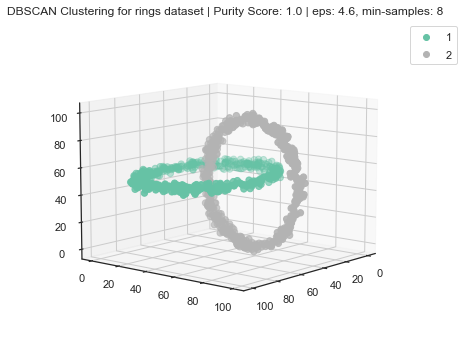

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_theme(style="white", palette="pastel")

# read dataset 
data = pd.read_csv("./data/3/rings.txt",delim_whitespace=True,header=None).sample(frac = 1)
X = np.array(data[[1,2,3]])

# run dbscan
data[4] = DBSCAN(X,8,4.6)

#plot the results
info = data.to_dict()
pu = purity_score(data[0],data[4])

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("Set2", 256).as_hex())
sc = ax.scatter(data[1], data[2], data[3], s=40, c=data[4], marker='o', cmap=cmap)
ax.view_init(elev=10., azim=40)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.title("DBSCAN Clustering for rings dataset | Purity Score: {0} | eps: {1}, min-samples: {2}".format(round(pu,2),4.6,8))
plt.show()

# Clustering for spiral dataset 

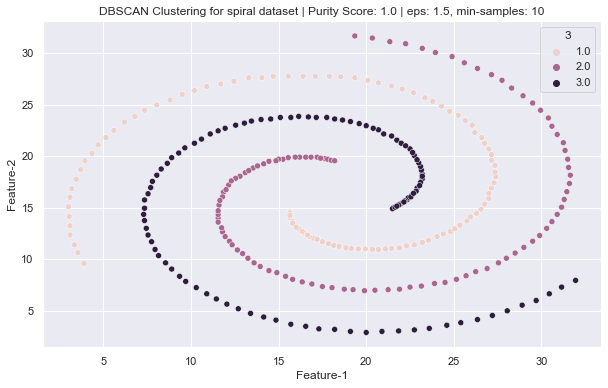

In [18]:
# read dataset 
data = pd.read_csv("./data/3/spiral.txt",delim_whitespace=True,header=None).sample(frac = 1)
X = np.array(data[[0,1]])
sns.set_theme(style="darkgrid", palette="pastel") 
# run dbscan
data[3] = DBSCAN(X,10,1.5)

pu = purity_score(data[2],data[3])

#plot the results
info = data.to_dict()
sns.scatterplot(data=info,x=0,y=1,hue=3)
plt.title("DBSCAN Clustering for spiral dataset | Purity Score: {0} | eps: {1}, min-samples: {2}".format(round(pu,2),1.5,10))
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()